In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_csv(r'CLEAN_DATA\2005-2020_percountry_peryear_final.csv')

df.head()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


,Unnamed: 0.1,Unnamed: 0,countryname,year,rile,stance_positivity_score,gini Coefficient,leading,welfare spending,electoral_dem_ind,GNI,variable_interaction
0,0,0,Sweden,2006,-8.132000,34.300000,0.263525,left,26.408,0.915,4.340743e+11,-2.925581e+15
1,1,7,Sweden,2010,-4.296375,34.593625,0.277382,left,25.849,0.915,5.092813e+11,-1.790279e+15
2,2,15,Sweden,2014,-15.754750,54.500250,0.283897,left,26.587,0.916,5.942473e+11,-1.242631e+16
3,3,23,Sweden,2018,-10.283625,58.764000,0.299742,left,25.633,0.909,5.665538e+11,-7.977412e+15
4,4,31,Norway,2005,-15.257286,37.567143,0.305976,left,20.737,0.892,3.133711e+11,-3.322424e+15


In [3]:
# Selecting columns for clustering
columns_for_clustering = [
     'countryname',
     'year',
     'rile',
     'stance_positivity_score',
     'gini Coefficient',
     'leading',
     'welfare spending',
     'electoral_dem_ind',
     'GNI',
     'variable_interaction'
]

df = df[columns_for_clustering]

# Dummy encoding 'leading'
df = pd.get_dummies(df, columns=['leading'])

# Averaging the relevant columns for each country to ensure each country appears in one cluster
df = df.groupby('countryname').mean(numeric_only=True).reset_index()

# Dummy encoding 'countryname'
df = pd.get_dummies(df, columns=['countryname'])

In [4]:
# imputing missing values with the mean
imputer = SimpleImputer(strategy='mean')
df_imputed = imputer.fit_transform(df)

# Standardize the imputed data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)

In [5]:
# Determine the optimal number of clusters using the elbow method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

: 

In [ ]:
# Performing KMeans clustering with k=4 on the data
kmeans_avg = KMeans(n_clusters=4, random_state=42)
clusters_avg = kmeans_avg.fit_predict(df_scaled)

# Adding the cluster labels to the dataframe
df['Cluster'] = clusters_avg

# Displaying the first few rows of the dataframe with cluster labels
df.head()

c:\Users\Vincent\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,year,rile,stance_positivity_score,gini Coefficient,welfare spending,electoral_dem_ind,GNI,variable_interaction,leading_left,leading_right,...,countryname_Russia,countryname_Serbia,countryname_Slovakia,countryname_Slovenia,countryname_Spain,countryname_Sweden,countryname_Switzerland,countryname_Ukraine,countryname_United Kingdom,Cluster
0,2012.6,-9.448747,49.843693,0.301454,27.11500,0.86580,4.121489e+11,-4.702283e+15,0.600000,0.400000,...,False,False,False,False,False,False,False,False,False,1
1,2012.5,-5.332301,49.251755,0.282418,27.15425,0.89825,5.134891e+11,-4.431485e+15,1.000000,0.000000,...,False,False,False,False,False,False,False,False,False,1
2,2011.6,-0.458663,49.951033,0.370486,NaN,0.67260,4.992002e+10,NaN,0.600000,0.400000,...,False,False,False,False,False,False,False,False,False,3
3,2013.8,-8.772609,56.763440,0.309542,NaN,0.79880,5.611153e+10,NaN,0.800000,0.200000,...,False,False,False,False,False,False,False,False,False,1
4,2011.0,0.530556,50.573250,0.322144,NaN,0.84500,2.251300e+10,NaN,0.333333,0.666667,...,False,False,False,False,False,False,False,False,False,0


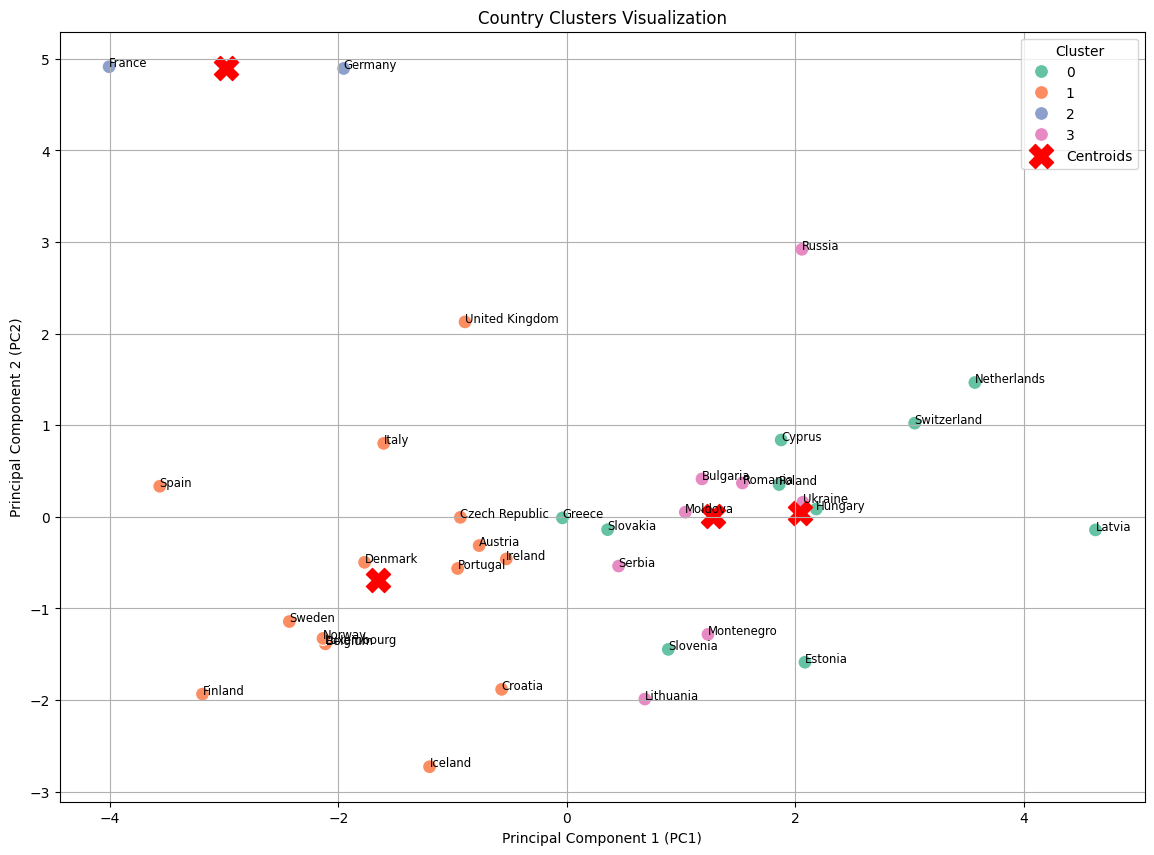

In [ ]:
# Applying PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)

# Creating a DataFrame with the principal components
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df['Cluster']

# Extracting country names from column names
country_columns = df.columns[df.columns.str.startswith('countryname_')]
df_pca['Country'] = country_columns.str.replace('countryname_', '')

# Calculate cluster centroids for better visualization
centroids = kmeans_avg.cluster_centers_

# Transform centroids using PCA
centroids_pca = pca.transform(centroids)

# Plotting the clusters
plt.figure(figsize=(14, 10))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=100, edgecolor="w")

# Plotting centroids
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=300, c='red', marker='X', label='Centroids')

for line in range(0, df_pca.shape[0]):
    plt.text(df_pca.PC1[line], df_pca.PC2[line], 
             df_pca.Country[line], horizontalalignment='left', 
             size='small', color='black')

plt.title('Country Clusters Visualization')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [ ]:
df_clusters = df_pca[['Cluster', 'Country']].groupby('Cluster')['Country'].apply(list).reset_index()

# Ensure dataframe doesn't get cut off
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

# Display list of countries per cluster
display(df_clusters)

,Cluster,Country
0,0,"[Cyprus, Estonia, Greece, Hungary, Latvia, Netherlands, Poland, Slovakia, Slovenia, Switzerland]"
1,1,"[Austria, Belgium, Croatia, Czech Republic, Denmark, Finland, Iceland, Ireland, Italy, Luxembourg, Norway, Portugal, Spain, Sweden, United Kingdom]"
2,2,"[France, Germany]"
3,3,"[Bulgaria, Lithuania, Moldova, Montenegro, Romania, Russia, Serbia, Ukraine]"
